#### Lab 4: Convolution

#### Jiwon Woo

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal

#### Assignment 1 - Convolution of Two Signals 

In [10]:
fs = 8000
epsilon = 1.0 / (2.0*fs)
t = np.arange(0, 1+epsilon, 1.0/fs)
x1 = np.heaviside(t, 1) - np.heaviside(t-1, 1)
x0 = -x1

y0 = np.convolve(x1, x0) /fs
y1 = np.convolve(x1, x1) /fs

In [3]:
t_y = np.arange(0, len(y1), 1) /fs

<IPython.core.display.Javascript object>


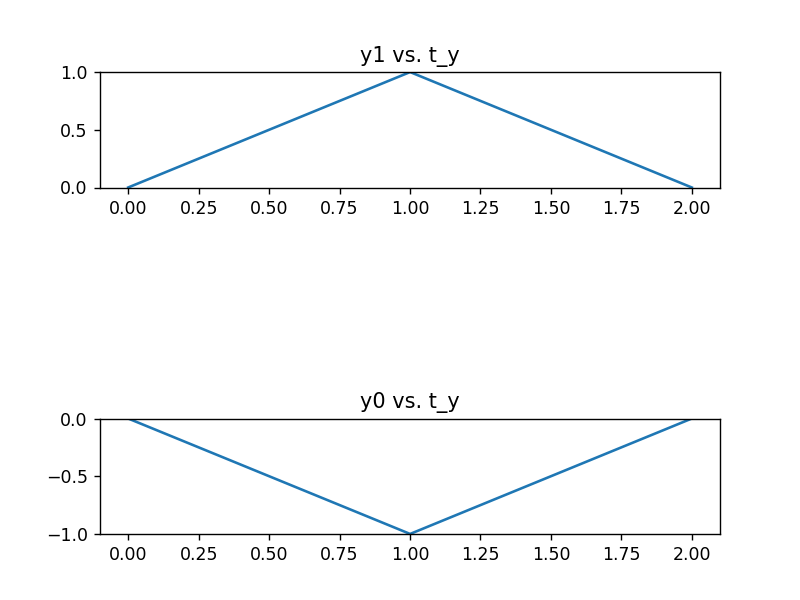

In [4]:
fig1 = plt.figure(1)
plt.subplots_adjust(hspace = 2, wspace = 1)
plt.subplot(2,1,1)
plt.title('y1 vs. t_y')
plt.ylim(0,1)
plt.plot(t_y, y1)
plt.subplot(2, 1, 2)
plt.title('y0 vs. t_y')
plt.ylim(-1,0)
plt.plot(t_y, y0)

#### 2.0 Convolution and Correlation

In [5]:
y1_corr = y1[int(1.0*fs)-1]
y0_corr = y0[int(1.0*fs)-1]
print (y1_corr, y0_corr)

1.0 -1.0


In [6]:
noise = np.random.normal(0,10,len(x1))

<IPython.core.display.Javascript object>


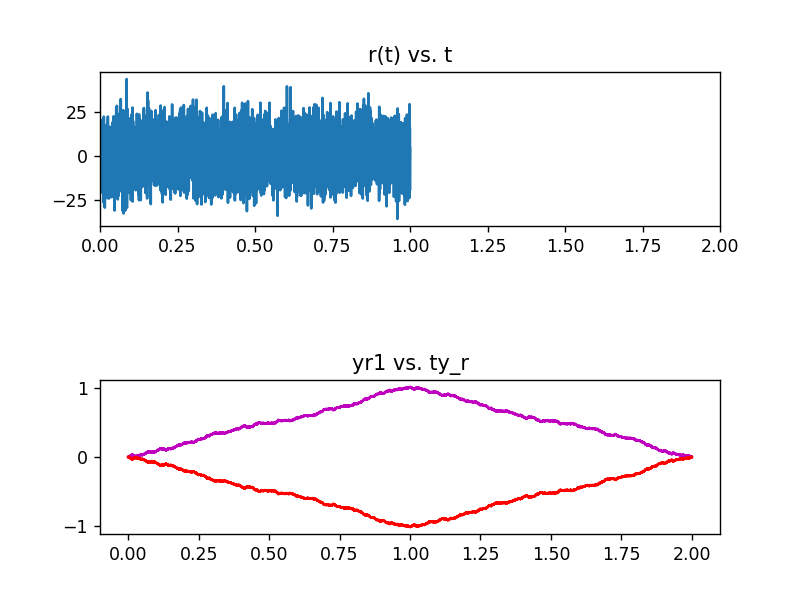

In [7]:
r = x1 + noise

t_r = np.arange(0, len(r), 1) /fs

yr1 = np.convolve(r, x1) /fs
yr0 = np.convolve(r, x0) /fs
ty_r = np.arange(0, len(yr1), 1) /fs

fig2 = plt.figure(2)
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.title('r(t) vs. t')
plt.xlim(0,2)
plt.plot(t_r, r)
plt.subplot(2, 1, 2)
plt.title('yr1 vs. ty_r')
plt.plot(ty_r, yr1, 'm', ty_r, yr0, 'r' )

#### 3.0 Correlation and Signal Decoding

In [16]:
def decode(x, d, fs, x0, x1):
    y0 = np.convolve(x, x0) 
    y1 = np.convolve(x, x1)
    y1_corr = y1[d-1]
    y0_corr = y0[d-1]
    if (y1_corr > y0_corr):
        return 1
    else:
        return 0

In [17]:
s1 = decode(x1, len(x1), fs, x0, x1)
s0 = decode(x0, len(x0), fs, x0, x1)
print (s1, s0)

1 0


#### 4.0 Decipher Received Message in Digital Communication System

In [27]:
file = open('receivedmsg.csv', 'rb')
rm = np.loadtxt(file, delimiter=',')
rm.shape
messagebits = []

In [28]:
for x in rm:
    blue = np.copy(x)
    z = decode(blue, len(blue), fs, x0, x1)
    messagebits.append(z)

In [29]:
print(messagebits)


[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]


#### Discussion

#### Go Huskies!

In [30]:
message_bits = [decode(x,len(x), fs, x0, x1) for x in rm]

In [31]:
print(message_bits)

[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
